In [1]:
import pandas as pd
import matplotlib.pyplot as plt

x = [2104, 1600, 2400]
y = [399.9, 329.9, 369]
predictions = [379, 288, 432]
difference = [21, 42, -63]
difference_squared = [449, 1756, 3969]

In [2]:
df = pd.DataFrame({'sqft':x,'price_in_thous':y,
                  'predictions':predictions,
                  'difference':difference,
                  'diff_squared':difference_squared})

In [3]:
import numpy as np

In [4]:
sqft = [2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1419]
bathrooms = [3, 3, 3, 2, 4, 4, 3, 3, 3, 3]
price = [399900, 329900, 369000, 232000, 539000, 299900,
        314900, 198999, 212000, 242500]

df = pd.DataFrame({'sqft':sqft, 'bathrooms':bathrooms, 'price':price})
df.head(10)

,sqft,bathrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539000
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1419,3,242500


In [63]:
np.random.seed(42)
inputs = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])

In [64]:
correct_outputs=[[0], [1], [1], [0]]

In [65]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [66]:
def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx*(1-sx)

In [67]:
# Initialize Random Weights

weights = np.random.random((3, 1))

In [68]:
weights

array([[0.37454012],
       [0.95071431],
       [0.73199394]])

In [69]:
weighted_sum = np.dot(inputs, weights)

In [70]:
weighted_sum

array([[0.73199394],
       [2.05724837],
       [1.10653406],
       [1.68270825]])

In [71]:
activated_outputs = sigmoid(weighted_sum)
activated_outputs

array([[0.67524268],
       [0.88667798],
       [0.75148239],
       [0.84326281]])

In [72]:
error = correct_outputs - activated_outputs
error

array([[-0.67524268],
       [ 0.11332202],
       [ 0.24851761],
       [-0.84326281]])

Gradient Descent/Backprop!

In [73]:
adjustments = error * sigmoid_derivative(activated_outputs)
adjustments

array([[-0.15094138],
       [ 0.02341811],
       [ 0.05412196],
       [-0.17737063]])

In [74]:
weights = weights + np.dot(inputs.T, adjustments)

In [75]:
weighted_sum = np.dot(inputs, weights)
activated_outputs = sigmoid(weighted_sum)
error = correct_outputs - activated_outputs
error

array([[-0.61803639],
       [ 0.1505794 ],
       [ 0.28225525],
       [-0.78210638]])

In [76]:
for iteration in range(10000):
    weighted_sum = np.dot(inputs, weights)
    activated_output = sigmoid(weighted_sum)
    error = correct_outputs - activated_outputs
    adjustments = error * sigmoid_derivative(weighted_sum)
    weights = weights + np.dot(inputs.T, adjustments)

In [77]:
weights

array([[16.10519128],
       [-0.80418871],
       [-8.07375825]])

Iterate over this for gradient descent.

1:20 on in video for GD/Backprop

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [19]:
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [20]:
y=np.where(y=='Iris-setosa', -1, 1)

In [21]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [22]:
X = df.iloc[0:100, [0,2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [23]:
class Perceptron(object):
    def __init__(self, rate=.01, niter=10):
        self.rate=rate
        self.niter=niter
        
    def fit(self, X, y):
        
        # the number of features plus a bias term
        self.weight = np.zeros(1 + X.shape[1])
        
        self.errors=[]
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                # if error isn't exactly zero, return 1 - add "1" to error term.
    
                err += int(delta_w != 0.0)
                
            self.errors.append(err)
            
        return self
    
    # return weighted matrix multiplication of inputs - 
    #x, feature weights, bias weight.
    def net_input(self, X):
        return np.dot(X, self.weight[1:] + self.weight[0])
    
    def predict(self, X):
        # return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, -1)
     #written to match Sklearn api - fit, predict methods.
        #1:52 on previous lecture.

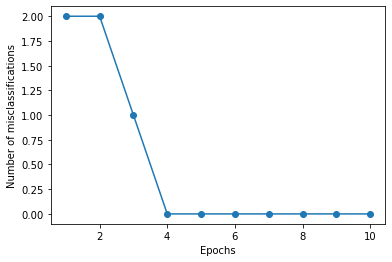

In [24]:
pn = Perceptron(.01, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()